In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from analysis_utils.plotting import *
from analysis_utils.describe_target import *
from analysis_utils.spatial_CV import *

In [11]:
import matplotlib
# set the font size for matplotlib and the font family.
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
# set the root data directory
root_data_dir = "../../Data"
sat_img_dir = f"{root_data_dir}/satellite_imgs"

# Load the LSMS data
lsms_path = f"{root_data_dir}/lsms/processed/labels_cluster_v1.csv"
lsms_df = pd.read_csv(lsms_path)
lsms_df['log_mean_pc_cons_usd_2017'] = np.log(lsms_df['mean_pc_cons_usd_2017'])

# Exemplary data split
split the data using spatial k-fold CV and store the data split to map it using R

In [4]:
# set the random seed
random_seed = 348

# set the number of folds for k-fold CV
n_folds = 5

# do the spatial CV split
fold_ids = split_lsms_spatial(lsms_df, n_folds = n_folds, random_seed = random_seed)

# store the split to the data
ex_split_df = lsms_df.copy()
ex_split_df['val_fold'] = pd.Series([k for i in ex_split_df['cluster_id'] for k, v in fold_ids.items() if i in v['val_ids']])    

ex_split_df.to_csv('../../Data/lsms/processed/ex_cv_split.csv', index = False)

Fold 0, specified test ratio: 0.2 - Actual test ratio 0.21
Fold 1, specified test ratio: 0.2 - Actual test ratio 0.21
Fold 2, specified test ratio: 0.2 - Actual test ratio 0.20
Fold 3, specified test ratio: 0.2 - Actual test ratio 0.20
Fold 4, specified test ratio: 0.2 - Actual test ratio 0.18


## Describe the dataset in general

In [7]:
# get the number of households in total
n_hh_df = lsms_df[['cluster_id', 'n_households']].drop_duplicates().reset_index(drop = True)
sum(n_hh_df['n_households'])

18550

In [3]:
np.std(lsms_df['mean_asset_index_yeh'])

1.547772612244532

## Describe the target variables

In [3]:
#### Table 1: Describe the target variables
print('Mean PC consumption')
print('mean & median & min & max & sd & n')
describe_target(lsms_df, 'mean_pc_cons_usd_2017')
print("Mean Asset index")
describe_target(lsms_df, 'mean_asset_index_yeh')

Mean PC consumption
mean & median & min & max & sd & n
    4.09 &    3.19 &    0.33 &    65.66 &    3.34 &    7141 \\
Mean Asset index
    0.13 &    -0.21 &    -2.67 &    4.66 &    1.55 &    7141 \\


In [4]:
#### Table 2: Describe the target variables by country
print("Consumption expenditure")
describe_target_cntry(lsms_df, 'mean_pc_cons_usd_2017')
print("\nLog Consumption expenditure")
describe_target_cntry(lsms_df, 'log_mean_pc_cons_usd_2017')
print("\nAsset Index")
describe_target_cntry(lsms_df, 'mean_asset_index_yeh')

Consumption expenditure
Ethiopia & 2.47 & 2.14 & 0.33 & 12.27 & 1.48 & 1193 \\
Malawi & 4.10 & 3.21 & 1.15 & 46.51 & 3.72 & 408 \\
Nigeria & 4.92 & 4.26 & 1.16 & 42.69 & 3.27 & 1595 \\
Tanzania & 4.33 & 3.38 & 0.79 & 65.66 & 3.53 & 2195 \\
Uganda & 4.12 & 2.94 & 0.52 & 45.64 & 3.60 & 1750 \\

Log Consumption expenditure
Ethiopia & 0.75 & 0.76 & -1.10 & 2.51 & 0.56 & 1193 \\
Malawi & 1.25 & 1.17 & 0.14 & 3.84 & 0.50 & 408 \\
Nigeria & 1.45 & 1.45 & 0.15 & 3.75 & 0.52 & 1595 \\
Tanzania & 1.29 & 1.22 & -0.24 & 4.18 & 0.56 & 2195 \\
Uganda & 1.17 & 1.08 & -0.65 & 3.82 & 0.67 & 1750 \\

Asset Index
Ethiopia & -1.09 & -1.56 & -2.67 & 2.86 & 1.28 & 1193 \\
Malawi & -0.37 & -0.72 & -1.87 & 3.34 & 0.98 & 408 \\
Nigeria & 0.74 & 0.81 & -2.25 & 4.66 & 1.26 & 1595 \\
Tanzania & 0.86 & 1.20 & -2.36 & 3.96 & 1.65 & 2195 \\
Uganda & -0.39 & -0.65 & -2.63 & 4.07 & 1.10 & 1750 \\


In [5]:
# Table 3: Decompose the variance into SSW and SSB
print("Consumption expenditure")
_ = decomp_SST(lsms_df, 'cluster_id', 'mean_pc_cons_usd_2017')

print("\n\nLog Consumption Expenditure")
_ = decomp_SST(lsms_df, 'cluster_id', 'log_mean_pc_cons_usd_2017')

print("\n\nAsset Index")
_ = decomp_SST(lsms_df, 'cluster_id', 'mean_asset_index_yeh')

Consumption expenditure
SSW = 15488.5623 - SSB = 64124.9129 - SST = 79613.4751 - SST directly calc = 79613.4751
Share of SSW = 0.1945 - Share of SSB = 0.8055

 Latex ouput
mean_pc_cons_usd_2017 & 15488.56 & 64124.91 & 79613.48 & 0.19 & 0.81 & 7141


Log Consumption Expenditure
SSW = 393.5443 - SSB = 2345.2700 - SST = 2738.8143 - SST directly calc = 2738.8143
Share of SSW = 0.1437 - Share of SSB = 0.8563

 Latex ouput
log_mean_pc_cons_usd_2017 & 393.54 & 2345.27 & 2738.81 & 0.14 & 0.86 & 7141


Asset Index
SSW = 563.2399 - SSB = 16543.7401 - SST = 17106.9800 - SST directly calc = 17106.9800
Share of SSW = 0.0329 - Share of SSB = 0.9671

 Latex ouput
mean_asset_index_yeh & 563.24 & 16543.74 & 17106.98 & 0.03 & 0.97 & 7141


In [6]:
lsms_df['n_households'].describe()

count    7141.000000
mean        7.716846
std         2.913445
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        16.000000
Name: n_households, dtype: float64

In [5]:
# Within variance in relation to the number of households per cluster
thresholds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
n = []
n_clusters = []
n_clusters_cntry = []
variance_share = []
for i in thresholds:
    sub_df = lsms_df[lsms_df.n_households >= i].reset_index(drop = True)
    SSW, SSB, SST = decomp_SST(sub_df, 'cluster_id', 'log_mean_pc_cons_usd_2017', verbose = False)
    variance_share.append(SSW/SST)
    n.append(len(sub_df))
    n_clusters.append(len(np.unique(sub_df.cluster_id)))
    n_country = sub_df.groupby('country')['cluster_id'].nunique()
    n_clusters_cntry.append(n_country)

In [6]:
n_clusters_cntry_df = pd.DataFrame(n_clusters_cntry).reset_index(drop = True)
n_clusters_cntry_df['n_households'] = thresholds
n_clusters_cntry_df = n_clusters_cntry_df.fillna(0)

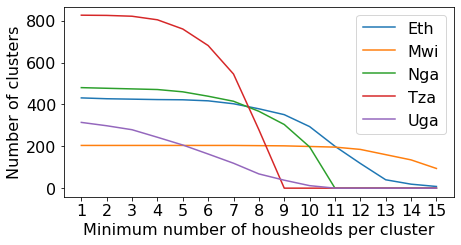

In [25]:
plt.figure(figsize = (7,3.5))
plt.plot(n_clusters_cntry_df['n_households'], n_clusters_cntry_df['eth'],label = 'Eth')
plt.plot(n_clusters_cntry_df['n_households'], n_clusters_cntry_df['mwi'],label = 'Mwi')
plt.plot(n_clusters_cntry_df['n_households'], n_clusters_cntry_df['nga'],label = 'Nga')
plt.plot(n_clusters_cntry_df['n_households'], n_clusters_cntry_df['tza'],label = 'Tza')
plt.plot(n_clusters_cntry_df['n_households'], n_clusters_cntry_df['uga'],label = 'Uga')
plt.legend()
plt.xticks(ticks = thresholds)
plt.xlabel("Minimum number of housheolds per cluster")
plt.ylabel('Number of clusters')
pth = "../figures/target_vars/number_of_clusters_vs_households.png"
plt.savefig(pth, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

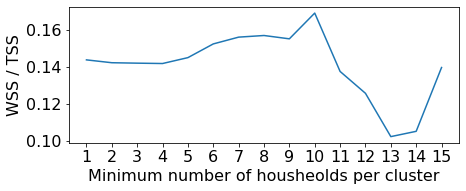

In [24]:
plt.figure(figsize = (7,2.5))
plt.plot(thresholds, variance_share)
plt.xticks(ticks = thresholds)
plt.xlabel("Minimum number of housheolds per cluster")
plt.ylabel('WSS / TSS')
plt.savefig("../figures/target_vars/share_WSS.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [21]:
print('Number of observations')
print(n)
print('\nNumber of clusters')
print(n_clusters)

Number of observations
[7141, 7025, 6879, 6593, 6228, 5652, 4911, 3699, 2539, 1888]

 Number of clusters
[2255, 2231, 2203, 2145, 2052, 1904, 1686, 1296, 895, 702]


# Plot static satellite images

In [3]:
cluster_id = 'uga_3040004'

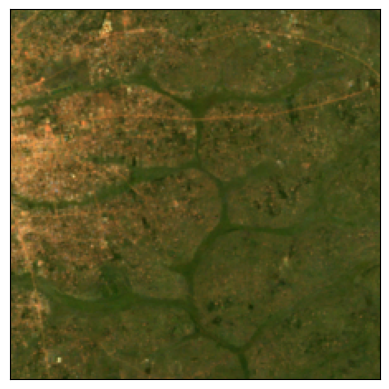

In [4]:
plot_ls(cluster_id, fname = 'median_ls_example.png')

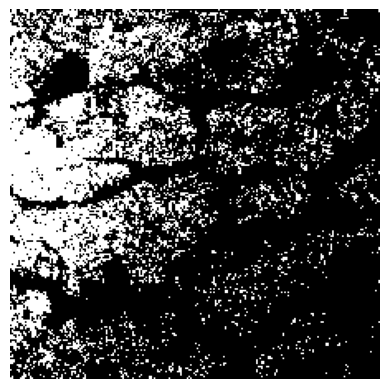

In [5]:
plot_wsf(cluster_id, fname = 'wsf_example.png')

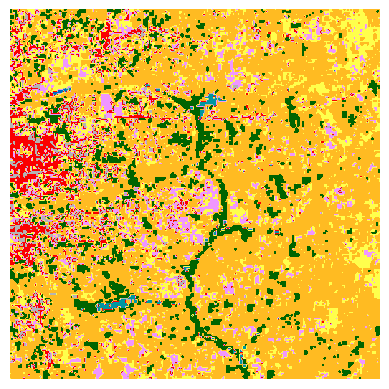

In [6]:
plot_lc_esa(cluster_id, fname = 'esa_lc_example.png', legend = False)

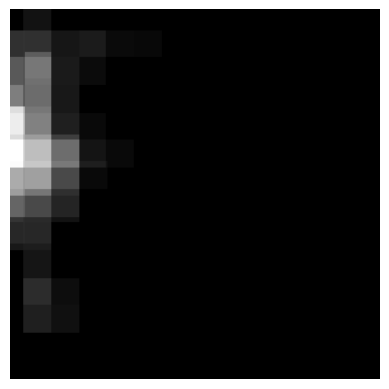

In [7]:
plot_mean_nl(cluster_id, 'mean_nl_example.png')

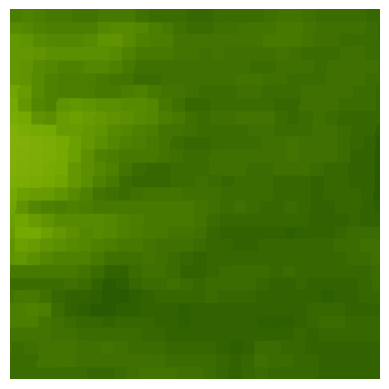

In [8]:
plot_mean_ndvi(cluster_id, fname = 'mean_ndvi_example.png')

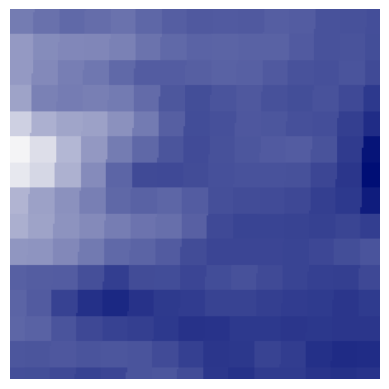

In [9]:
plot_mean_ndwi(cluster_id, fname = 'mean_ndwi_example.png')

# Plot dynamic images

In [4]:
#unique_id = 'uga_3040004_2018'
cluster_id = 'uga_3040004'

In [27]:
data_type = 'RS_v2'
sat_img_dir = "../../Data/satellite_imgs"
img_dir = f"{sat_img_dir}/RS_v2/{data_type}_mean_cluster"
img_pth = f"{img_dir}/{data_type}_{cluster_id}.npy"

mean_img = np.load(img_pth)

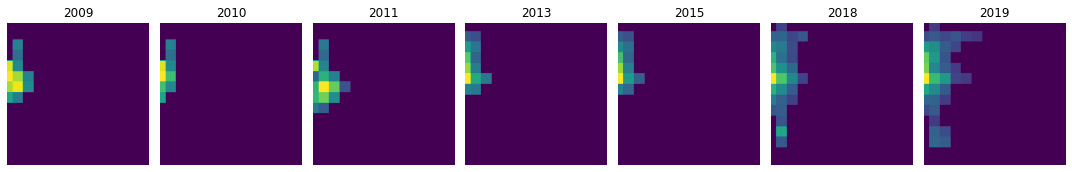

In [21]:
plot_nl_cluster(cluster_id)

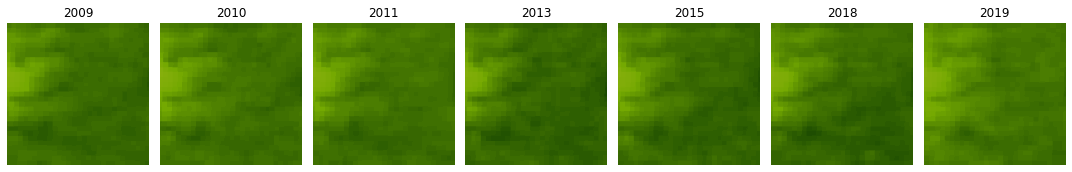

In [10]:
plot_ndvi_cluster(cluster_id)

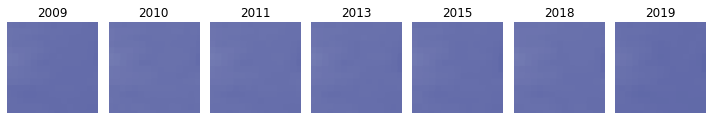

In [77]:
plot_ndwi_gao_cluster(cluster_id)

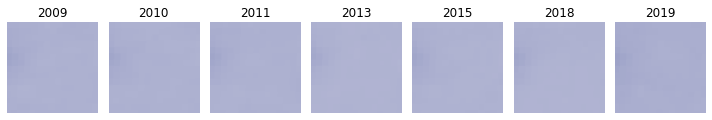

In [78]:
plot_ndwi_mcf_cluster(cluster_id)

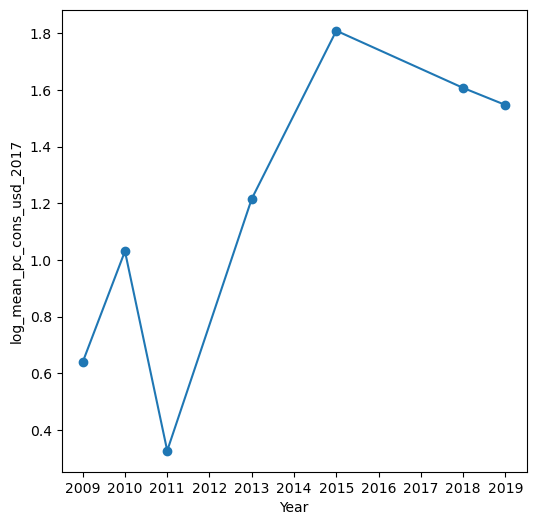

In [46]:
plot_target_cluster(cluster_id, lsms_df, 'log_mean_pc_cons_usd_2017')

# Plot demeaned images

RS_v2_uga_3040004_2019.npy


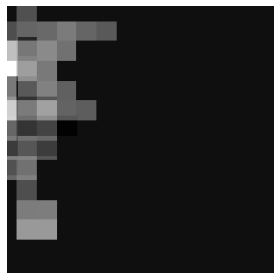

RS_v2_uga_3040004_2019.npy


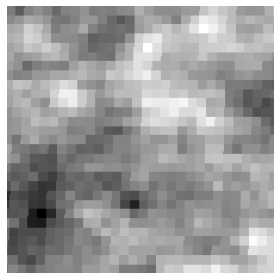

RS_v2_uga_3040004_2019.npy


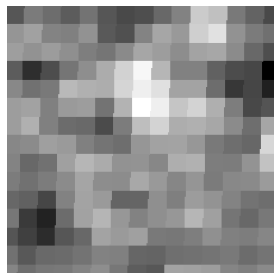

RS_v2_uga_3040004_2019.npy


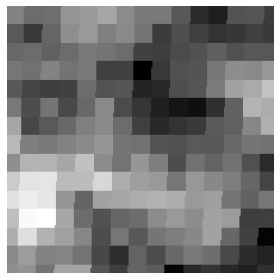

In [76]:
img_types = ['nl', 'ndvi', 'ndwi_gao', 'ndwi_mcf']
for i in range(4):
    fname = f"demeaned_{img_types[i]}_example.png"
    plot_demeaned_img(cluster_id, channel = i, fname = fname)

In [59]:
def plot_delta_imgs(cluster_id, fname=None, title=None, channel=0):
    data_type = 'RS_v2'
    sat_img_dir = "../../Data/satellite_imgs"
    img_dir = f"{sat_img_dir}/RS_v2/{data_type}_deltas"

    # List all files in image directory
    files = np.array(os.listdir(img_dir))
    mask = [cluster_id in i for i in files]
    files = np.sort(files[mask])

    # Plot images
    num_images = len(files)

    max_images_per_row = 7
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row
    num_cols = min(num_images, max_images_per_row)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    im = None  # To store the image object for the colorbar

    for i, file in enumerate(files):
        year_1 = file[-13:-9]
        year_2 = file[-8:-4]
        img_pth = os.path.join(img_dir, file)
        img = np.load(img_pth)[:, :, channel]

        row_idx = i // max_images_per_row
        col_idx = i % max_images_per_row

        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        im = ax.imshow(img, vmin=-.2, vmax=.2)  # Adjust vmin and vmax as needed
        ax.axis('off')
        ax.set_title(f"{year_1} - {year_2}")

    plt.tight_layout()

    # Add a single legend for the entire figure
    if im:
        fig.colorbar(im, ax=axes.ravel().tolist(), orientation='vertical', pad=0.02, aspect=40)

    if fname is not None:
        pth = f"../figures/sat_imgs/{fname}"
        plt.savefig(pth, dpi=300, bbox_inches='tight')

    plt.show()

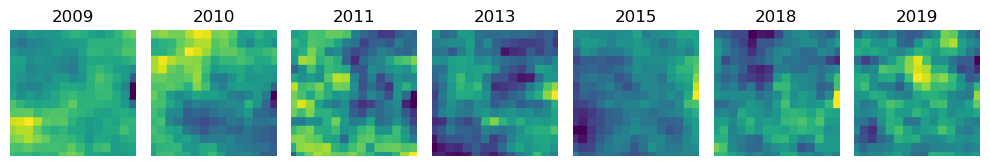

In [29]:
plot_demeaned_imgs(cluster_id, channel = 2)

In [45]:
data_type = 'RS_v2'
sat_img_dir = "../../Data/satellite_imgs"
img_dir = f"{sat_img_dir}/RS_v2/{data_type}_deltas"

# list all files in image directory
files = np.array(os.listdir(img_dir))
mask = [cluster_id in i for i in files]
files = np.sort(files[mask])

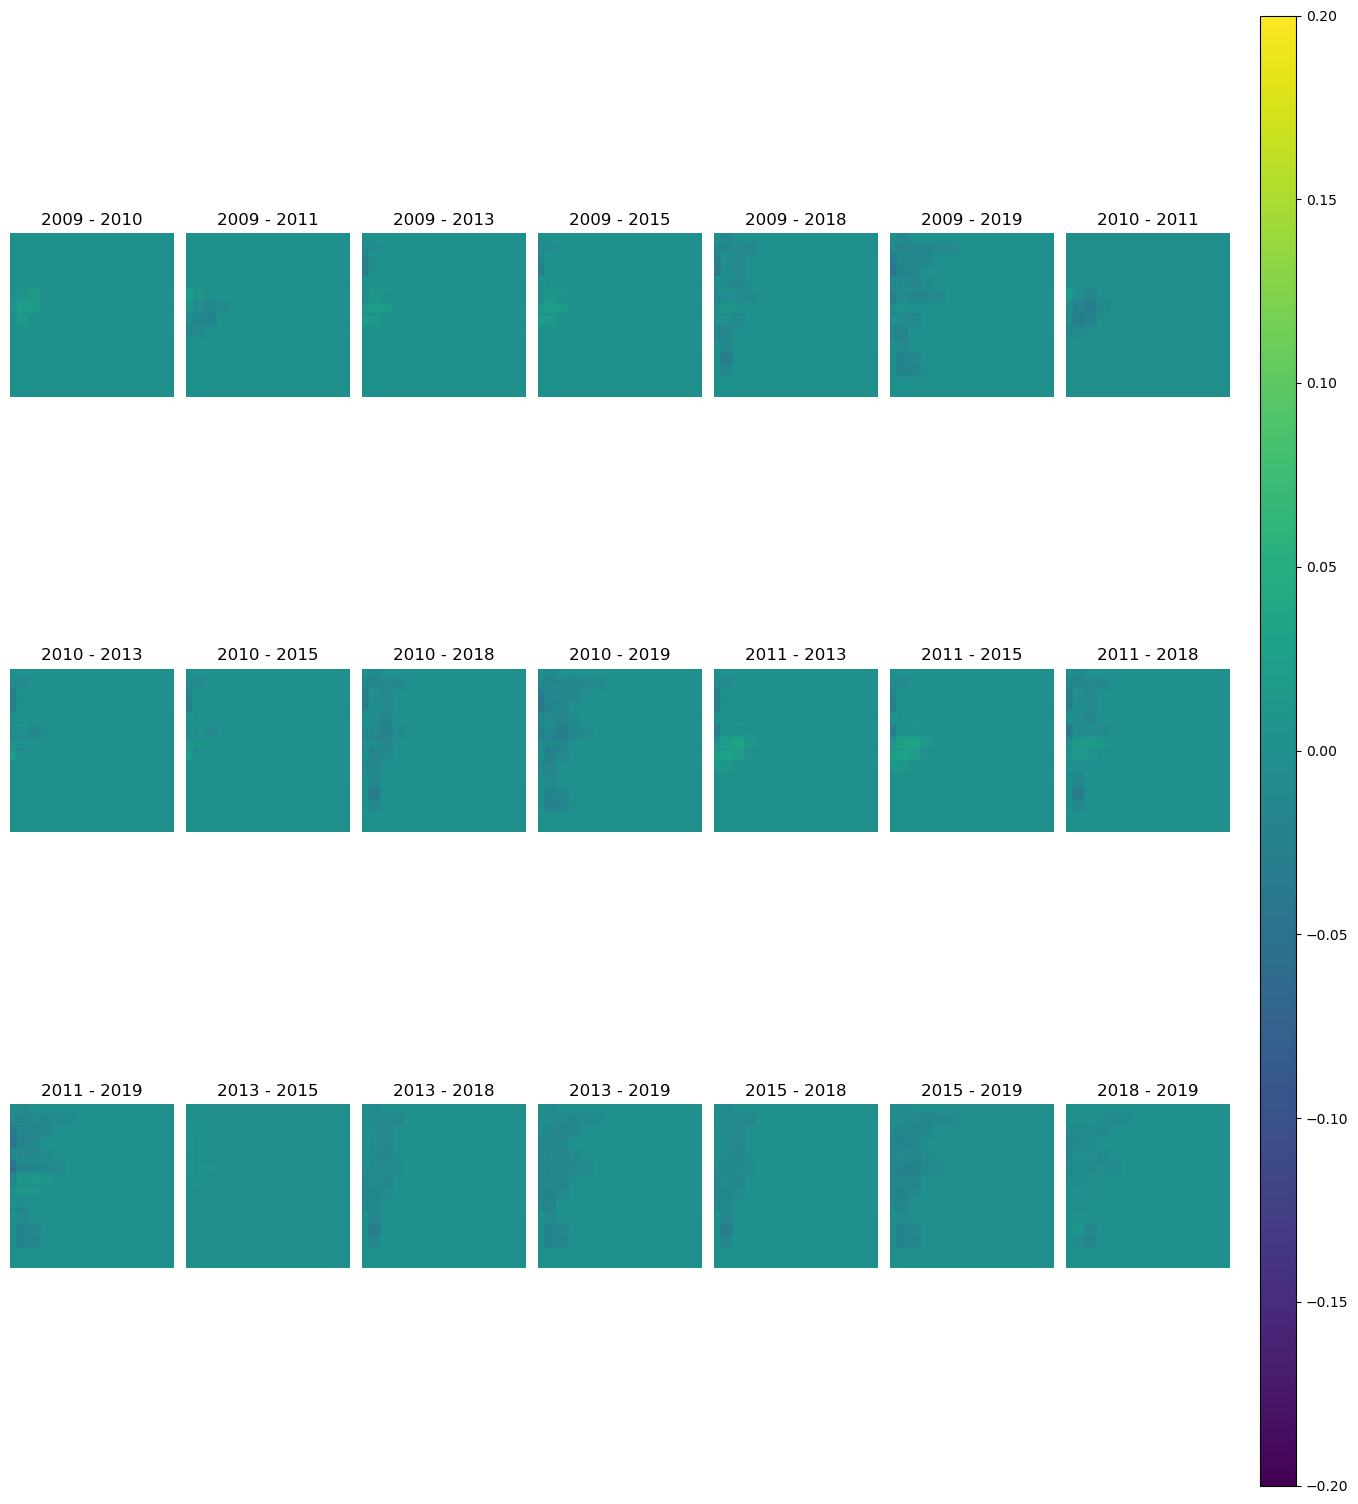

In [60]:
plot_delta_imgs(cluster_id, channel = 0)